In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io

# Report Week01
## Dataset overview

### Cấu trúc dữ liệu
- Đối tượng: Sinh viên thuộc nhiều ngành học khác nhau
- Số lượng bản ghi: 5000 sinh viên
- Số lượng thuộc tính (trường): 23 thuộc tính bao gồm thông tin cá nhân, học thuật, xã hội
- Dữ liệu bị thiếu:
    -   Attendance (%): Thiếu 516 giá trị.
    -   Assignments_Avg: Thiếu 517 giá trị.
    -   Parent_Education_Level: Thiếu 1794 giá trị.





In [3]:
df=pd.read_csv("Students_Grading_Dataset.csv")
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [4]:
print(f"🟢 Rows: {df.shape[0]} | 🔵 Columns: {df.shape[1]}")


🟢 Rows: 5000 | 🔵 Columns: 23


In [14]:
info = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.notnull().sum(),
    'Dtype': df.dtypes
})

print(info)

                                                Column  Non-Null Count  \
Gender                                          Gender            5000   
Age                                                Age            5000   
Department                                  Department            5000   
Attendance (%)                          Attendance (%)            4484   
Midterm_Score                            Midterm_Score            5000   
Final_Score                                Final_Score            5000   
Assignments_Avg                        Assignments_Avg            4483   
Quizzes_Avg                                Quizzes_Avg            5000   
Participation_Score                Participation_Score            5000   
Projects_Score                          Projects_Score            5000   
Total_Score                                Total_Score            5000   
Grade                                            Grade            5000   
Study_Hours_per_Week              Stud

In [6]:
df.describe()


,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


In [13]:
df["Attendance (%)"] = df["Attendance (%)"].fillna(df["Attendance (%)"].median())
df["Assignments_Avg"] = df["Assignments_Avg"].fillna(df["Assignments_Avg"].median())
df["Parent_Education_Level"] = df["Parent_Education_Level"].fillna("Unknown")

In [8]:
df.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email'], inplace=True)

In [7]:
# Checking for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


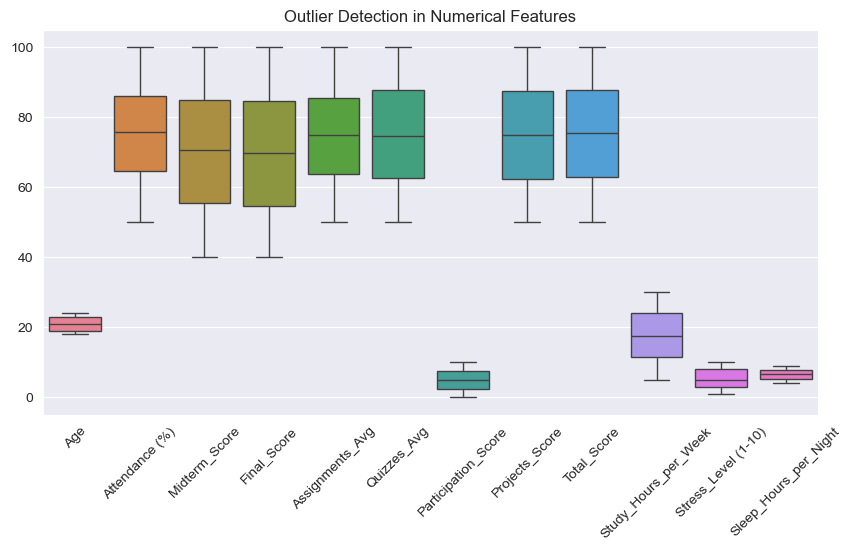

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.title("Outlier Detection in Numerical Features")
plt.xticks(rotation=45)
plt.show()

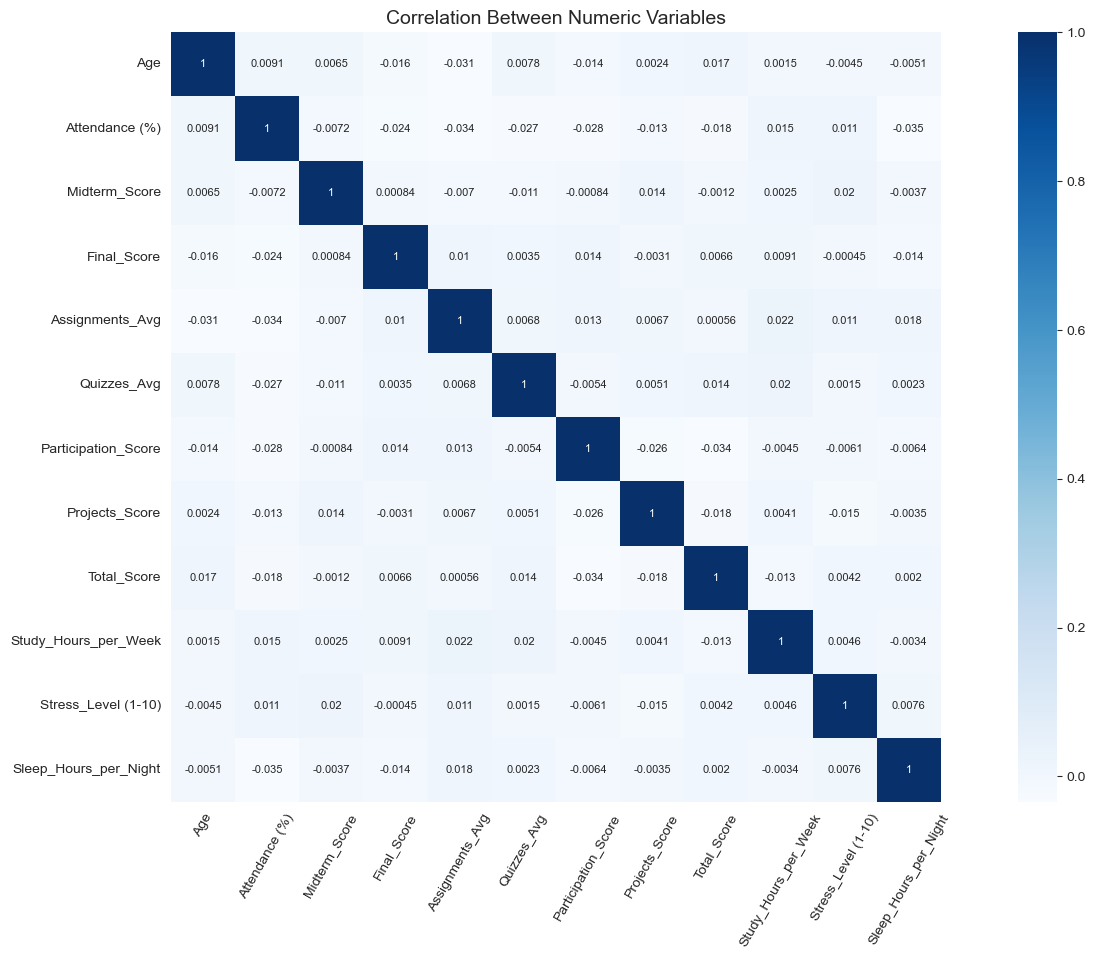

In [28]:
plt.figure(figsize=(20, 10))

numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), cbar=True, square=True, annot=True, annot_kws={'size':8}, cmap='Blues')
plt.title("Correlation Between Numeric Variables", fontsize=14)
plt.xticks(rotation=60)
plt.show()

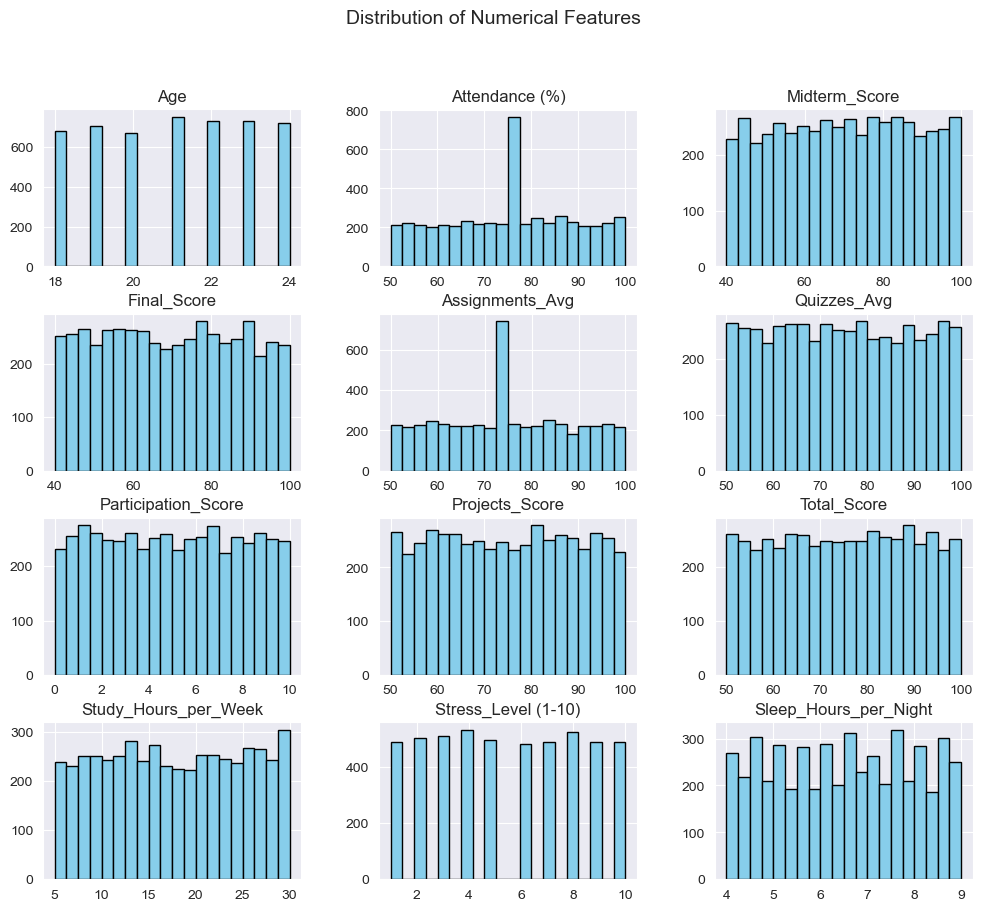

In [23]:
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=14)
plt.show()

In [5]:
null_counts = df.isnull().sum()
print(null_counts)  # print full

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64
